In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Training Word2Vec model...
Model training complete!


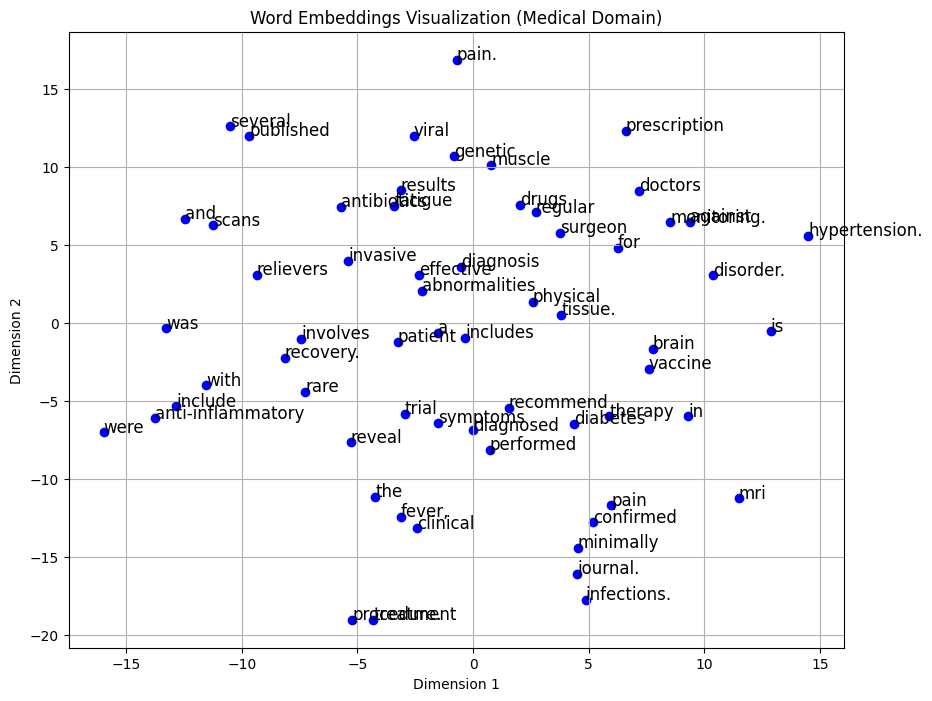

Words similar to 'treatment':
procedure. (0.27)
confirmed (0.15)
muscle (0.13)
monitoring. (0.12)
fatigue (0.12)
Words similar to 'vaccine':
brain (0.26)
recommend (0.21)
procedure. (0.19)
therapy (0.19)
in (0.18)


In [4]:
#%pip install gensim matplotlib
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Corpus and preprocessing
corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]
data = [s.lower().split() for s in corpus]

# Train Word2Vec
print("Training Word2Vec model...")
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
print("Model training complete!")

# t-SNE visualization
words = model.wv.index_to_key
vecs = np.array([model.wv[w] for w in words])
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
coords = tsne.fit_transform(vecs)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], color="blue")
for i, w in enumerate(words):
    plt.text(coords[i, 0], coords[i, 1] + 0.02, w, fontsize=12)
plt.title("Word Embeddings Visualization (Medical Domain)")
plt.xlabel("Dimension 1"); plt.ylabel("Dimension 2"); plt.grid(True); plt.show()

# Similar words
def similar(w, n=5):
    try:
        print(f"Words similar to '{w}':")
        for w2, s in model.wv.most_similar(w, topn=n):
            print(f"{w2} ({s:.2f})")
    except KeyError:
        print(f"'{w}' not found in vocabulary.")

similar("treatment")
similar("vaccine")